In [2]:
librarian::shelf(
  tidyverse, 
  glmnet,
  tidymodels
)
ggplot2::theme_set(theme_minimal())

Variable Description:

- occ : Occupational classification
- ind : Industry classification
- lwage : Log hourly wage
- sex : Gender (1 female) (0 male)
- shs : Some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: Experience

In [3]:
data = readr::read_csv("https://raw.githubusercontent.com/alexanderquispe/CausalAI-Course/main/data/wage2015_subsample_inference.csv", show_col_types = F) |> 
  dplyr::select(!rownames) |> 
  mutate(
    across(
      c(occ, occ2, ind, ind2), \(x) as.factor(x)
    )
  )

data |> glimpse()

Rows: 5,150
Columns: 20
$ wage  <dbl> 9.615385, 48.076923, 11.057692, 13.942308, 28.846154, 11.730769,…
$ lwage <dbl> 2.263364, 3.872802, 2.403126, 2.634928, 3.361977, 2.462215, 2.95…
$ sex   <dbl> 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1…
$ shs   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ hsg   <dbl> 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0…
$ scl   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1…
$ clg   <dbl> 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ ad    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ mw    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ so    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ we    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ ne    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ exp1  <dbl> 7.

In [32]:
# Filtering data to focus on college-advanced-educated workers
data_filtered <- data |> 
  filter(
    scl == 1| clg ==1 | ad == 1
  ) |> 
  mutate(
    sex = ifelse(sex == 0, "Male", "Female")
  )
n_data = dim(data_filtered)[1]
data_filtered |> head()

wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
9.615385,2.263364,Female,0,0,0,1,0,0,0,0,1,7,0.49,0.343,0.2401,3600,11,8370,18
48.076923,3.872802,Male,0,0,0,1,0,0,0,0,1,31,9.61,29.791,92.3521,3050,10,5070,9
13.942308,2.634928,Female,0,0,0,0,1,0,0,0,1,25,6.25,15.625,39.0625,420,1,6990,12
28.846154,3.361977,Female,0,0,0,1,0,0,0,0,1,22,4.84,10.648,23.4256,2015,6,9470,22
11.730769,2.462215,Female,0,0,0,1,0,0,0,0,1,1,0.01,0.001,0.0001,1650,5,7460,14
19.230769,2.956512,Female,0,0,0,1,0,0,0,0,1,4,0.16,0.064,0.0256,3255,10,8190,18


# Plots

In [5]:
main_variables = c("wage", "lwage", "sex", "scl", "clg", "ad", "exp1", "hsg")

data_filtered <- data_filtered |> select(any_of(main_variables))
data_filtered |> head(2)

wage,lwage,sex,scl,clg,ad,exp1,hsg
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.615385,2.263364,Female,0,1,0,7,0
48.076923,3.872802,Male,0,1,0,31,0


Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


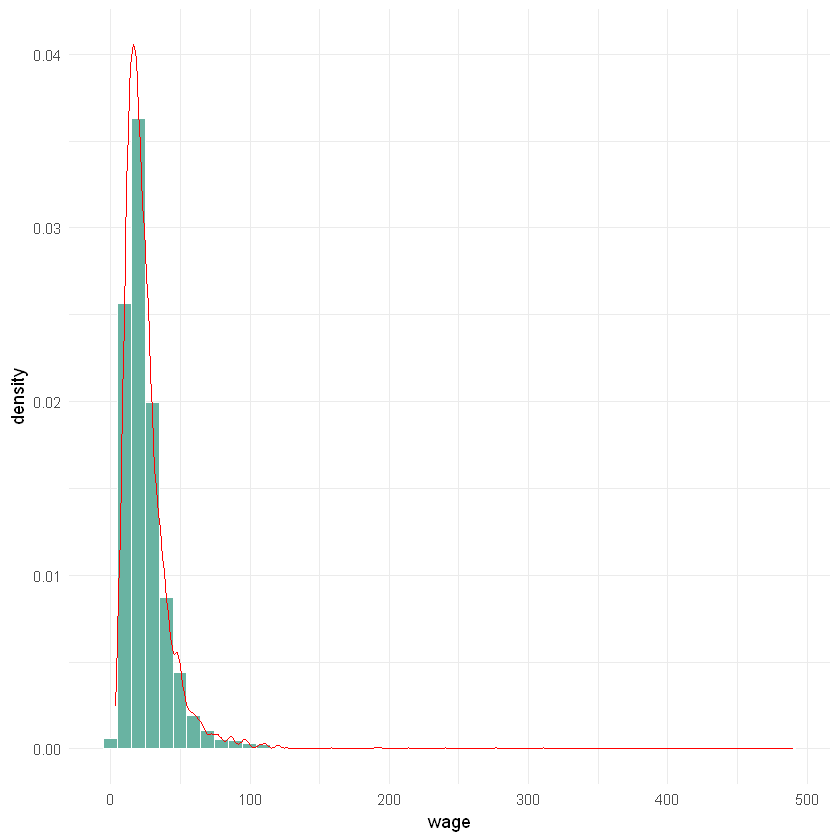

In [6]:
# wage
data_filtered |> 
  ggplot() +
  aes(x=wage, y = ..density..) +
  geom_histogram(bins = 50, fill="#69b3a2", color = 'white') +
  geom_density(color = 'red') + 
  scale_color_brewer(palette="Dark2")


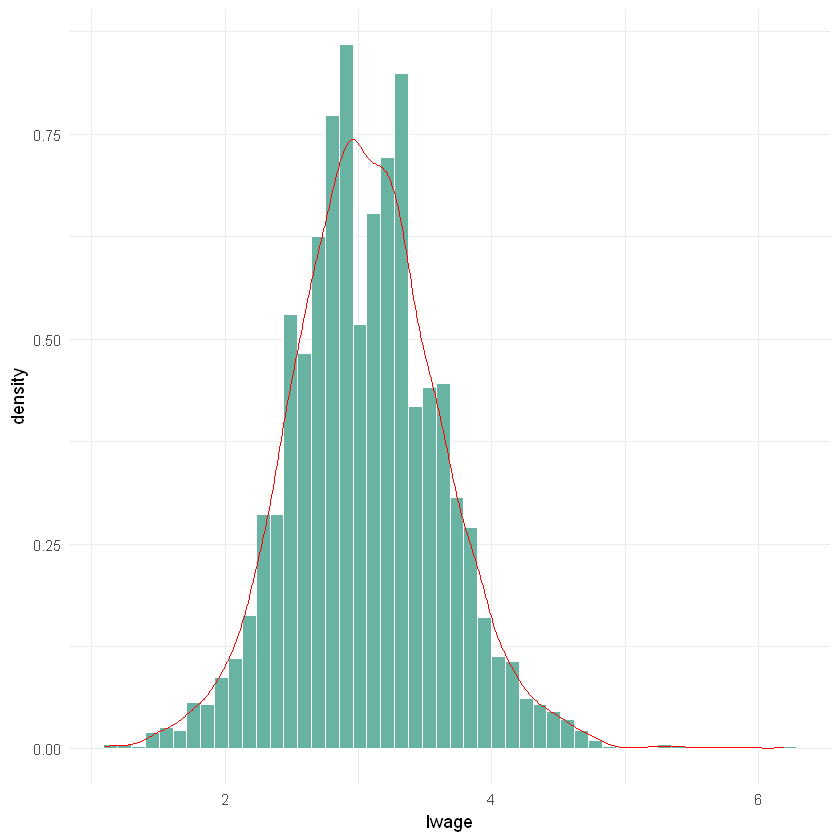

In [7]:
# lwage
data_filtered |> 
  ggplot() +
  aes(x=lwage, y = ..density..) +
  geom_histogram(bins = 50, fill="#69b3a2", color = 'white') +
  geom_density(color = 'red') + 
  scale_color_brewer(palette="Dark2")


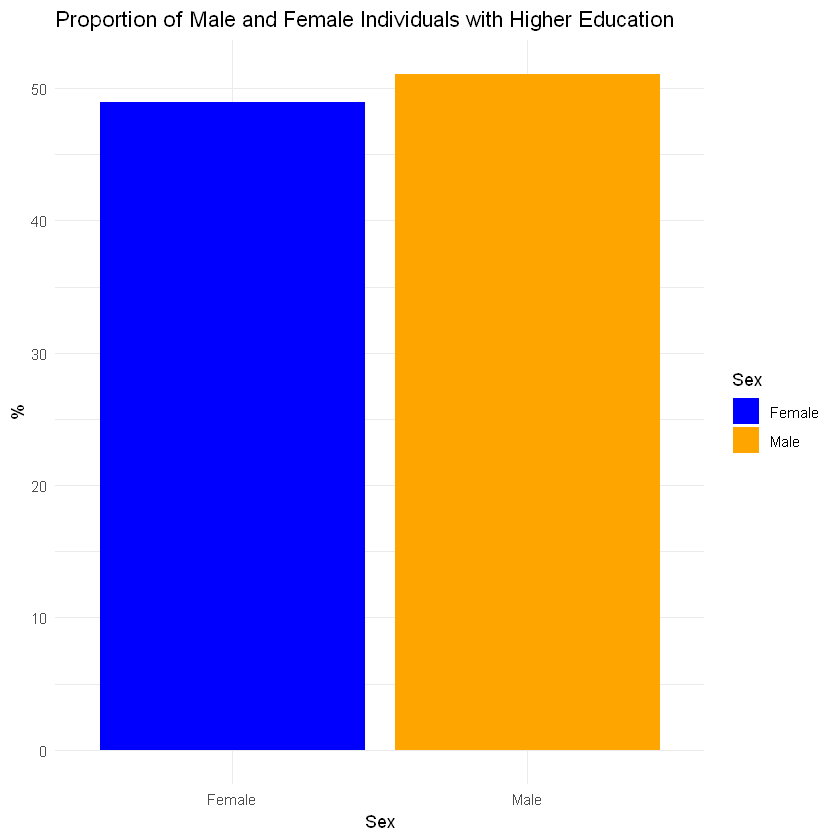

In [8]:
data_count_sex <- table(data_filtered$sex)
data_count_sex <- prop.table(data_count_sex) * 100
data_count_sex <- round(data_count_sex, 2)
data_count_sex <- as.data.frame(data_count_sex)


names(data_count_sex) <- c("Sex", "Proportion")


ggplot(data_count_sex, aes(x = Sex, y = Proportion, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Male and Female Individuals with Higher Education",
       x = "Sex",
       y = "%") +
  scale_fill_manual(values = c("blue", "orange")) +
  theme_minimal()

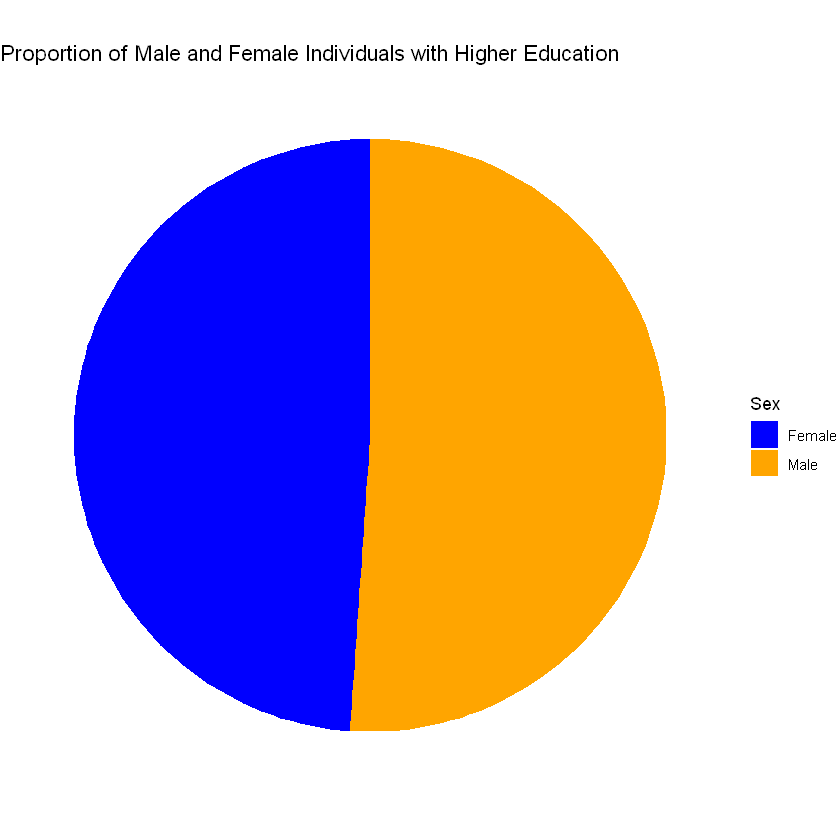

In [9]:
ggplot(data_count_sex, aes(x="",y = Proportion, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Male and Female Individuals with Higher Education",
       x = "Sex",
       y = "%") +
  scale_fill_manual(values = c("blue", "orange")) +
  theme_void() +
  coord_polar("y", start=0)

Warning message in geom_col(stats = "identity", width = 1, color = "white"):
"Ignoring unknown parameters: `stats`"


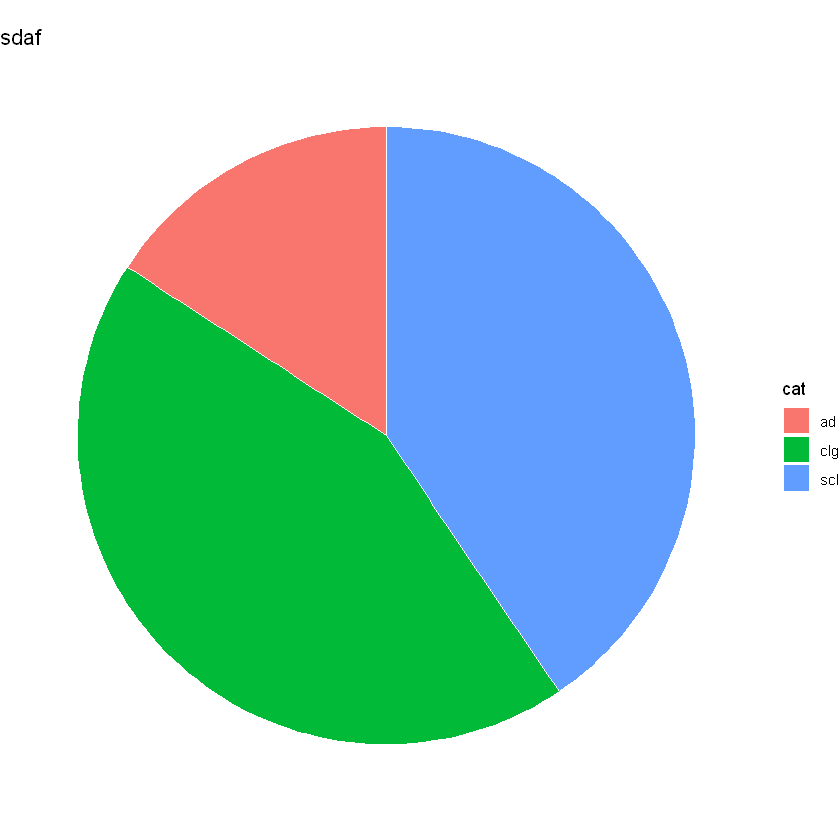

In [10]:
data_filtered |> 
  pivot_longer(
    c(scl, ad, clg)
    , names_to = 'cat'
  )  |> 
  filter(value > 0, sex == 'Male') |> 
  count(cat) |> 
  mutate(
    percent = n / sum(n) * 100
    , ypos = cumsum(percent) 
    ) |> 
  ggplot() + 
  aes(x="", y=percent, fill = cat) +
  geom_col(stats = 'identity', width = 1, color = 'white') +
  coord_polar('y', start = 0) +
  theme_void() +
  labs(
    title = "sdaf",
    color = "s"
  )

data_count_sex <- data_filtered %>%
  group_by(sex, ) %>%
  summarise(count = n()) %>%
  mutate(proportion = count / sum(count) * 100)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


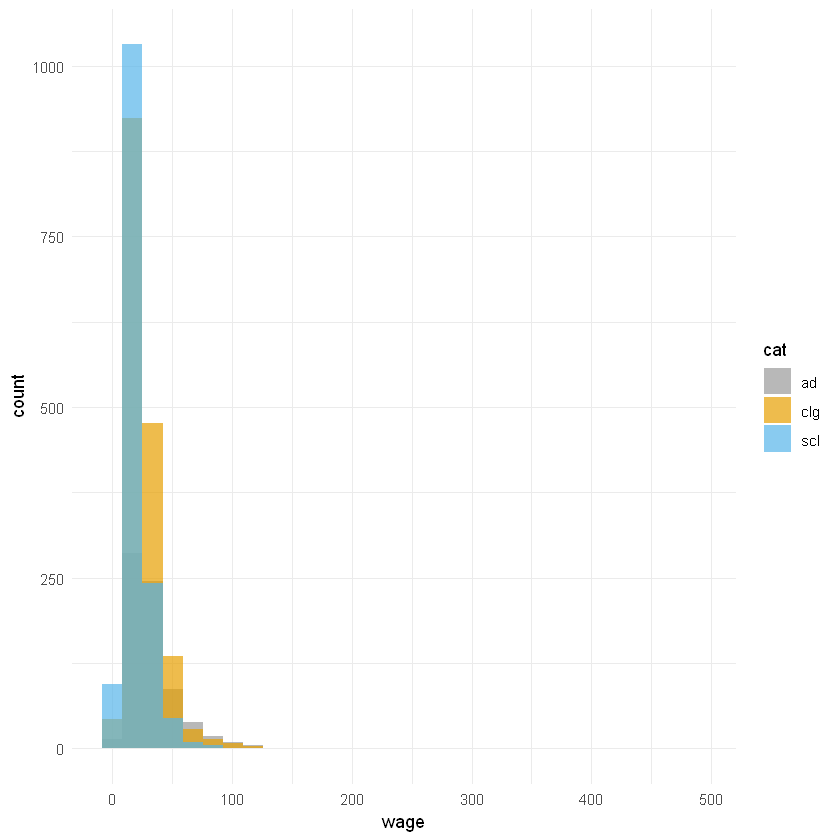

In [11]:
data_filtered |> 
  pivot_longer(
    c(scl, ad, clg)
    , names_to = 'cat'
  )  |> 
  filter(value > 0) |> 
  ggplot() +
  aes(x = wage, fill = cat) + 
  geom_histogram(position='identity', alpha = 0.7) +
  scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))


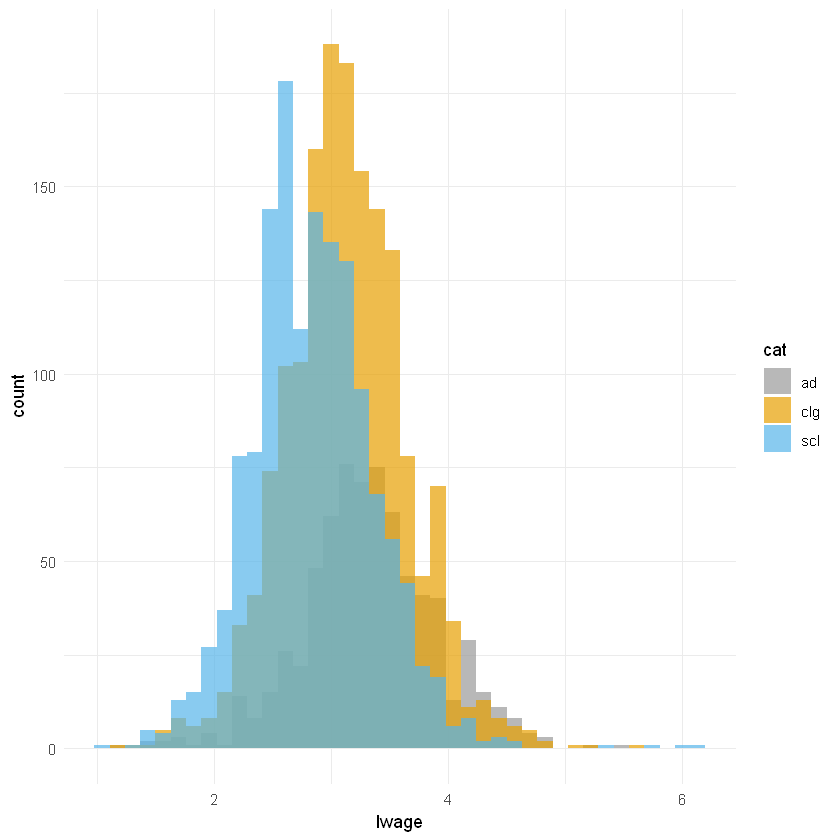

In [12]:
data_filtered |> 
  pivot_longer(
    c(scl, ad, clg)
    , names_to = 'cat'
  )  |> 
  filter(value > 0) |> 
  ggplot() +
  aes(x = lwage, fill = cat) + 
  geom_histogram(position='identity', alpha = 0.7, bins = 40) +
  scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))

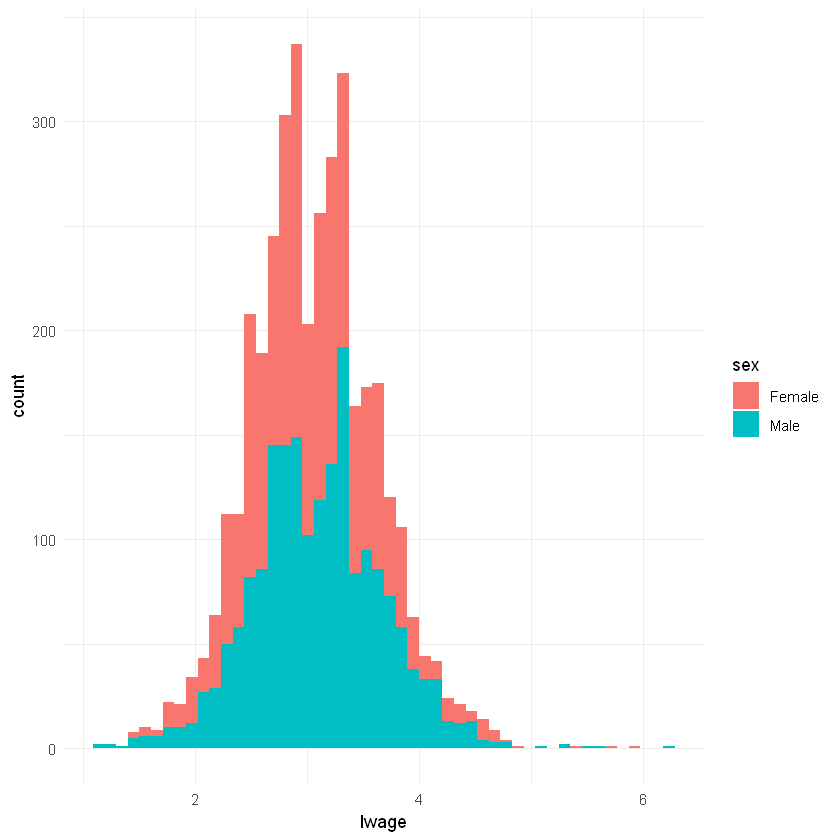

In [13]:
data_filtered |> 
  ggplot() +
  aes(x = lwage, fill = sex) +
  geom_histogram(bins = 50)

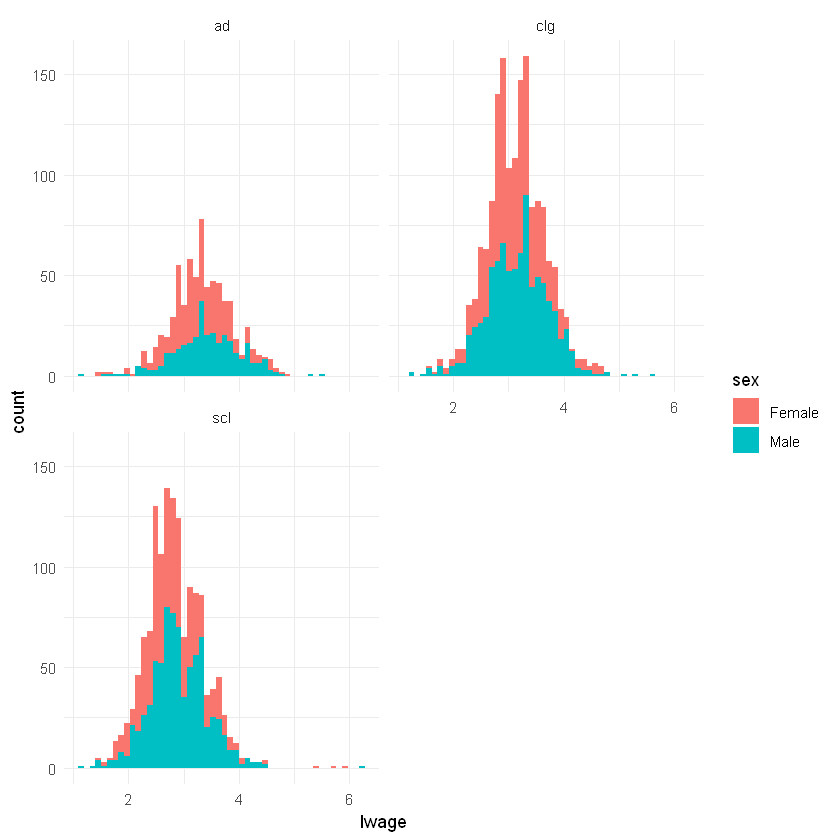

In [14]:
data_filtered |> 
  pivot_longer(
    c(scl, ad, clg)
    , names_to = 'cat'
  ) |> 
  filter(value > 0) |> 
  ggplot() +
  aes(x = lwage, fill = sex) +
  geom_histogram(bins = 50) +
  facet_wrap(~cat, ncol = 2)

# Estimation

## Basic

In [15]:
# no control model
# data_filtered <- 
data_filtered <- data[data$ad == 1 | data$scl == 1 | data$clg == 1, colnames(data)]

base <- lm(lwage ~ sex, data = data_filtered) 
ci_base <- confint(base)|> as_tibble()
base <- base |> broom::tidy()

## With Controls

In [16]:
flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)

control_fit <- lm(flex, data=data_filtered) 
ci_control = confint(control_fit)|> as_tibble()
control_fit <- control_fit |> broom::tidy()

## Partiallling Out

In [17]:
flex_y <- lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for Y
flex_d <- sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)

t_Y = lm(flex_y, data=data_filtered) |> resid()

t_D = lm(flex_d, data=data_filtered) |> resid()

new_data = tibble(
  y = t_Y,
  sex = t_D
)

partial_fit = lm(y ~ sex, data = new_data) 
ci_partial = confint(partial_fit) |> as_tibble()
partial_fit <- partial_fit|> broom::tidy()

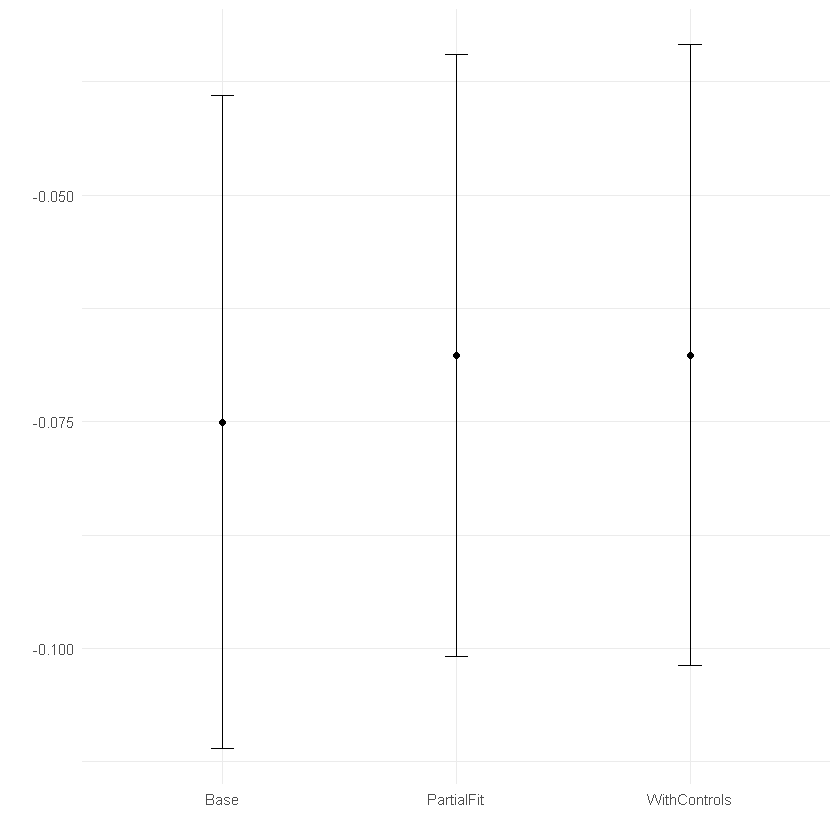

In [18]:
ci_df = bind_rows(ci_partial, ci_control, ci_base) |> rename(ll = 1, ul = 2)
bind_rows(partial_fit, control_fit, base) |> 
  bind_cols(ci_df) |> 
  filter(term == 'sex') |> 
  mutate(type = c('PartialFit', 'WithControls', 'Base')) |> 
  ggplot() +
  aes(x=type, y = estimate) + 
  geom_point() +
  geom_errorbar(
    aes(ymin = ll, ymax = ul), width = .1
  ) +
  labs(x="", y = '')

# Replication: Male and Female

## Male

In [19]:
type_education = c("clg", "hsg")

MODEL = lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)

predict_values <- function(type_edu, sex_, model = MODEL, group = 'exp1') {
  ref_data <- data %>%
    filter(sex == sex_) %>%
    filter(.data[[type_edu]] == 1)
  fiteed_md <- lm(model, data = ref_data)
  new_dat <- fiteed_md |> broom::augment() |> 
    select(exp1, lwage, .fitted) |> 
    group_by(exp1) |> 
    summarise(
      across(everything(), \(x) mean(x))
    )
  return(new_dat)
  
  
}
clg_mean <- predict_values("clg", 0)
hsg_mean <- predict_values("hsg", 0)
hsg_mean |> head()

exp1,lwage,.fitted
<dbl>,<dbl>,<dbl>
5,2.615219,2.597271
6,2.669723,2.691433
7,2.628311,2.657159
8,2.753753,2.642348
9,2.586999,2.695604
10,2.781384,2.733146


In [20]:
intersection <- inner_join(clg_mean, hsg_mean, by='exp1') |> pull(exp1)
hsg_in_gap <- hsg_mean |> filter(exp1 %in% intersection)
clg_in_gap <- clg_mean |> filter(exp1 %in% intersection)

gap_values <- function(col, df1, df2) {
  gap = df1 |> pull(col) - df2 |> pull(col)
  return(gap)
}
fitted_gap <- gap_values('.fitted', clg_in_gap, hsg_in_gap)
actual_gap <- gap_values('lwage', clg_in_gap, hsg_in_gap)
std_gap <- sd(actual_gap)

gap_df <- tibble(
  exp1 = intersection,
  .fitted = fitted_gap,
  ll = actual_gap - std_gap,
  ul = actual_gap + std_gap,
)
gap_df |> head(2)

exp1,.fitted,ll,ul
<dbl>,<dbl>,<dbl>,<dbl>
5,0.5246516,0.03238054,0.9190515
6,0.4272595,0.02956168,0.9162326


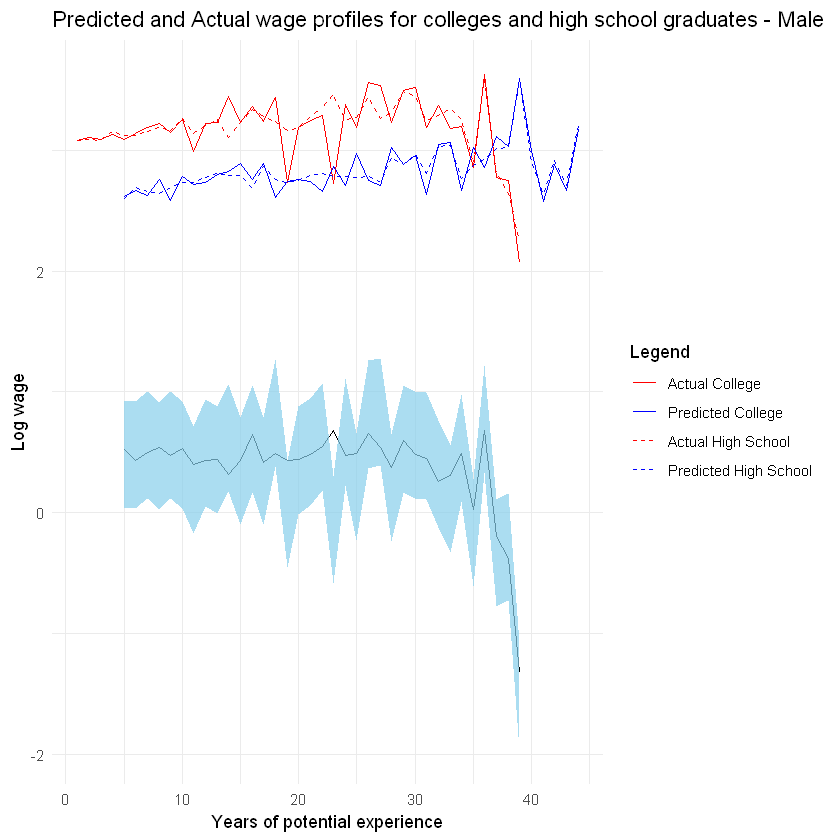

In [21]:
library(ggplot2)

# Definir colores y etiquetas
colors <- c("red", "blue", "red", "blue", 'black')
labels <- c("Actual College", "Predicted College", "Actual High School", "Predicted High School", "Gap Predicted")

# Graficar
ggplot() +
  geom_line(aes(x = exp1, y = lwage, color = "Actual College"), data = clg_mean) +
  geom_line(aes(x = exp1, y = .fitted, color = "Predicted College"), data = clg_mean, linetype = "dashed") +
  geom_line(aes(x = exp1, y = lwage, color = "Actual High School"), data = hsg_mean) +
  geom_line(aes(x = exp1, y = .fitted, color = "Predicted High School"), data = hsg_mean, linetype = "dashed") +
  geom_line(aes(x = exp1, y = .fitted, color = "Gap Predicted"), color='black', data = gap_df) +
  geom_ribbon(aes(x = exp1, ymin = ll, ymax = ul), fill = 'skyblue' , data = gap_df, alpha = 0.7) +
  scale_color_manual(values = colors, labels = labels) +
  # scale_fill_manual(values = colors, labels = "Gap Predicted") +
  labs(x = "Years of potential experience", y = "Log wage",
       title = "Predicted and Actual wage profiles for colleges and high school graduates - Male",
       color='Legend'
       ) +
  theme_minimal()


## Female

In [22]:
clg_mean <- predict_values("clg", 1)
hsg_mean <- predict_values("hsg", 1)
hsg_mean |> head()

exp1,lwage,.fitted
<dbl>,<dbl>,<dbl>
5,2.484081,2.469379
6,2.391093,2.473223
7,2.638640,2.563370
8,2.600319,2.471772
9,2.409274,2.562453
10,2.709616,2.585180


In [23]:
intersection <- inner_join(clg_mean, hsg_mean, by='exp1') |> pull(exp1)
hsg_in_gap <- hsg_mean |> filter(exp1 %in% intersection)
clg_in_gap <- clg_mean |> filter(exp1 %in% intersection)

gap_values <- function(col, df1, df2) {
  gap = df1 |> pull(col) - df2 |> pull(col)
  return(gap)
}
fitted_gap <- gap_values('.fitted', clg_in_gap, hsg_in_gap)
actual_gap <- gap_values('lwage', clg_in_gap, hsg_in_gap)
std_gap <- sd(actual_gap)

gap_df <- tibble(
  exp1 = intersection,
  .fitted = fitted_gap,
  ll = actual_gap - std_gap,
  ul = actual_gap + std_gap,
)
gap_df |> head(2)

exp1,.fitted,ll,ul
<dbl>,<dbl>,<dbl>,<dbl>
5,0.5626599,0.2418729,0.6925999
6,0.6011450,0.6119416,1.0626687


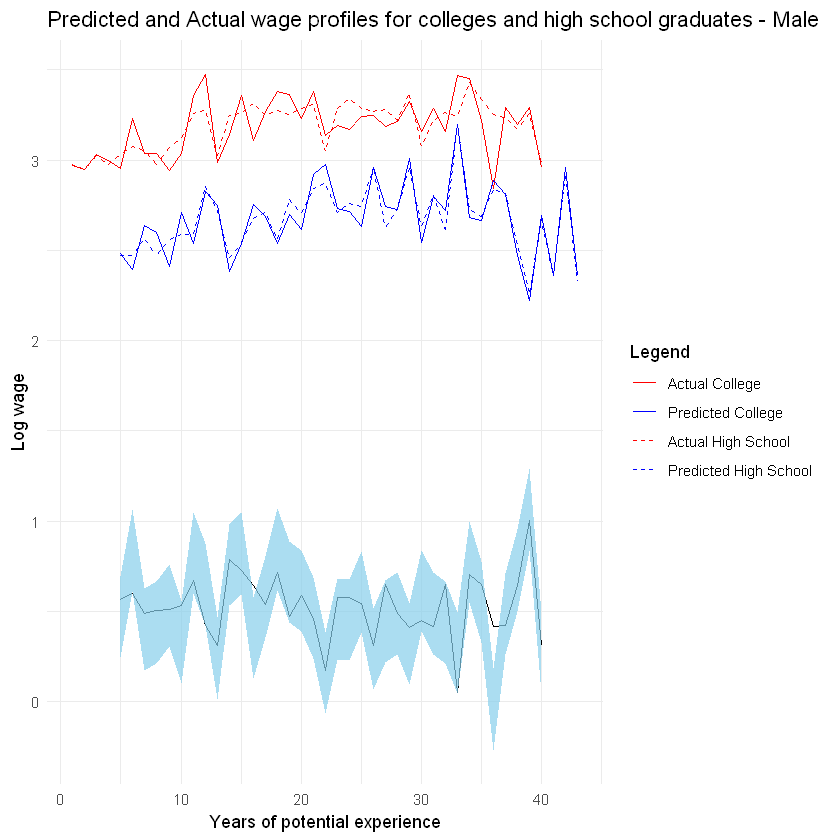

In [24]:
library(ggplot2)

# Definir colores y etiquetas
colors <- c("red", "blue", "red", "blue", 'black')
labels <- c("Actual College", "Predicted College", "Actual High School", "Predicted High School", "Gap Predicted")

# Graficar
ggplot() +
  geom_line(aes(x = exp1, y = lwage, color = "Actual College"), data = clg_mean) +
  geom_line(aes(x = exp1, y = .fitted, color = "Predicted College"), data = clg_mean, linetype = "dashed") +
  geom_line(aes(x = exp1, y = lwage, color = "Actual High School"), data = hsg_mean) +
  geom_line(aes(x = exp1, y = .fitted, color = "Predicted High School"), data = hsg_mean, linetype = "dashed") +
  geom_line(aes(x = exp1, y = .fitted, color = "Gap Predicted"), color='black', data = gap_df) +
  geom_ribbon(aes(x = exp1, ymin = ll, ymax = ul), fill = 'skyblue' , data = gap_df, alpha = 0.7) +
  scale_color_manual(values = colors, labels = labels) +
  # scale_fill_manual(values = colors, labels = "Gap Predicted") +
  labs(x = "Years of potential experience", y = "Log wage",
       title = "Predicted and Actual wage profiles for colleges and high school graduates - Male",
       color='Legend'
       ) +
  theme_minimal()


## Cross Validation


In [25]:
# alphas
alphas <- seq(0.1, 0.5, 0.1)
data_s <- data |> drop_na() |> select(!wage) |> mutate(across(everything(), \(x) as.double(x)))

In [26]:
rec <- recipe(lwage ~ ., data = data_s) 
prep <- rec |> prep(strings_as_factors = F)

splits <- map(
  1:5, \(x) initial_split(data_s, strata = lwage)
)


rmse_lasso <- function(split_model, alpha = 0.1, recipe = rec) {
  
  train <- training(split_model)
  test <- testing(split_model)
  # model
  lasso <- linear_reg(penalty = 0.1, mixture = alpha) |> #mixture = alpha 
    set_engine('glmnet')
  wf <- workflow() |> 
    add_recipe(rec)
  # fit
  lasso_fit <- wf |> 
    add_model(lasso) |> 
    fit(data = train)
  # mse
  result <- lasso_fit |> augment(test) |> 
    rmse(lwage, .pred) |> 
    mutate(alpha = alpha)
  return(result)
}

df_result <- tibble()

for(i_split in 1:length(splits)){
  for(j_alpha in alphas){
    result <- rmse_lasso(splits[[i_split]], j_alpha)
    df_result <- bind_rows(df_result, result)
  }
}

df_result 

.metric,.estimator,.estimate,alpha
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,0.5002072,0.1
rmse,standard,0.5033908,0.2
rmse,standard,0.5076726,0.3
rmse,standard,0.5130059,0.4
rmse,standard,0.5182999,0.5
rmse,standard,0.5162665,0.1
rmse,standard,0.5208929,0.2
rmse,standard,0.5267745,0.3
rmse,standard,0.5329322,0.4


In [27]:
result_arranged <- 
  df_result |> 
  group_by(alpha) |> 
  summarise(alpha_m = mean(.estimate)) |> 
  arrange(alpha_m)
result_arranged

alpha,alpha_m
<dbl>,<dbl>
0.1,0.5050610
0.2,0.5088431
0.3,0.5137342
0.4,0.5193464
0.5,0.5254703


In [28]:
result_arranged |> first()

alpha,alpha_m
<dbl>,<dbl>
0.1,0.505061


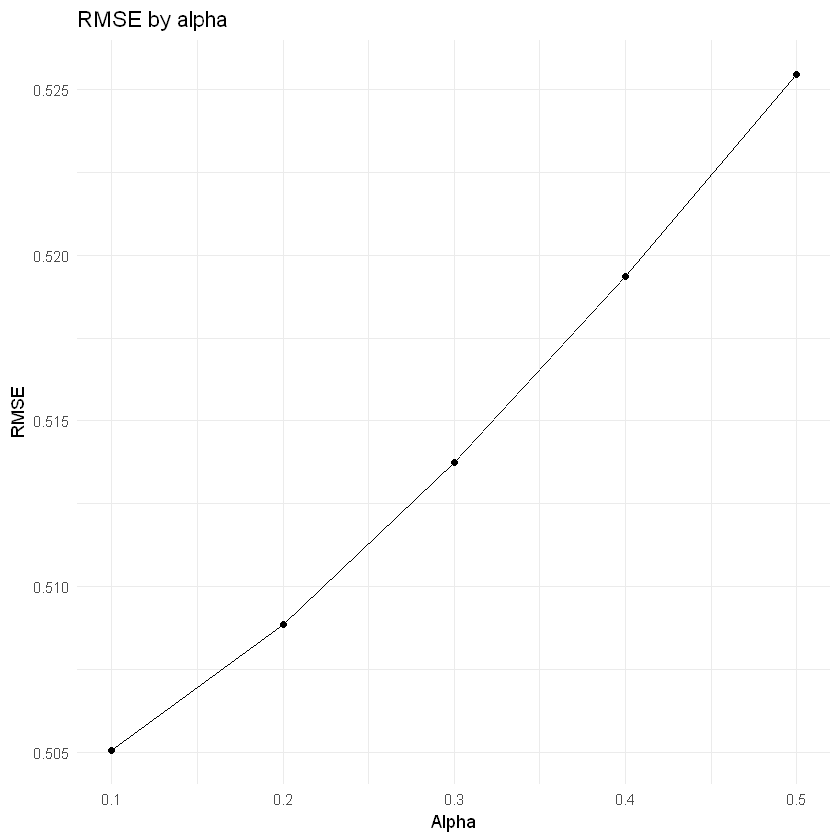

In [29]:
ggplot(result_arranged) +
  aes(alpha, alpha_m) +
  geom_point() +
  geom_line() +
  labs(title = 'RMSE by alpha', x='Alpha', y = 'RMSE')

In [30]:
rmse_lasso <- function(split_model, alpha = 0.1, recipe = rec) {
  
  train <- training(split_model)
  test <- testing(split_model)
  # model
  lasso <- linear_reg(penalty = 0.1, mixture = alpha) |> #mixture = alpha 
    set_engine('glmnet')
  wf <- workflow() |> 
    add_recipe(rec)
  # fit
  lasso_fit <- wf |> 
    add_model(lasso) |> 
    fit(data = train)
  # mse
  result <- lasso_fit |> augment(test) |> 
    rmse(lwage, .pred) |> 
    mutate(alpha = alpha)
  return(result)
}

lasso <- linear_reg(penalty =0.1, mixture = result_arranged |> first() |> pull(alpha)) |> 
  set_engine('glmnet')
wf <- workflow() |> 
  add_recipe(rec)

lasso_fit <- wf |> 
  add_model(lasso) |> 
  fit(data = data_s)

lass_pred <- lasso_fit |> augment(data_s) 
lass_pred |> head()

.pred,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.971862,2.263364,1,0,0,0,1,0,0,0,0,1,7,0.49,0.343,0.2401,150,11,199,17
3.293489,3.872802,0,0,0,0,1,0,0,0,0,1,31,9.61,29.791,92.3521,128,10,112,8
2.814137,2.403126,0,0,1,0,0,0,0,0,0,1,18,3.24,5.832,10.4976,258,19,12,3
3.454972,2.634928,1,0,0,0,0,1,0,0,0,1,25,6.25,15.625,39.0625,22,1,160,11
3.109826,3.361977,1,0,0,0,1,0,0,0,0,1,22,4.84,10.648,23.4256,93,6,225,21
3.066364,2.462215,1,0,0,0,1,0,0,0,0,1,1,0.01,0.001,0.0001,82,5,171,13


In [31]:
lass_pred |> yardstick::rmse(lwage, .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5038829
